### This Jupyter Notebook shows how to load the Twitter data into a dataframe

Useful links

* Introduction to Jupyter Notebooks: [Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough](https://www.youtube.com/watch?v=HW29067qVWk)
* Getting started with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html
* Getting started with natural language processing (NLP) with NLTK https://www.nltk.org/book/

In [1]:
import os
import json
import re
import nltk
import numpy as np
import pandas as pd
import random
from collections import Counter
from nltk.stem.porter import PorterStemmer
from pprint import pprint
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import wordnet
from nltk.text import Text
from wordcloud import WordCloud
from nltk.util import ngrams
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Search terms for the corpus: 
Fake news
Propaganda
Disinformation
Active measures
Subversion
Interference
Influence
Conspiracy
Deep state
Misinformation
Fabrication
Manipulate
Deceive
Useful idiots
Mainstream media
Populism
Untrustworthy
Hoax
Made-up
Bogus
Inaccurate
Doctored
Fact Checking
eu False
eu Fraud
eu Hoax
eu Lies
eu Rumours
eu Troll
europe False
europe Fraud
europe Hoax
europe Lies
europe Rumours
europe Troll
european False
european Fraud
european Hoax
european Lies
european Rumours
european Troll 

In [2]:
df = pd.read_pickle(r"C:\Users\Brands\Documents\Cardiff\Dissertation work\Data_analysis\Data\May_2019\climate_df_may19.pkl")

In [23]:
df.head(100)

,tweet_id,hashtags,tweet_text,is_reply,is_retweet,user_name,created
282,1123738521234288641,[],rt @sylviad32911201: a common trick used in climate propaganda is to use very bigly numbers and keep biggering and biggering them....\n\n....…,None,False,BobeMannBball,Wed May 01 23:58:36 +0000 2019
364,1123738407363129344,[],@newenergynowpa @governortomwolf @usclimate hi i’m with the deep state!,NewEnergyNowPA,False,mark52525786,Wed May 01 23:58:09 +0000 2019
684,1123738002260463617,[],"@fordm “a capital has been moved before, thus global warming is not real and this is a hoax and ima go buy my new suv that gets 5mpg after the fat tires and drive it around texas roads all day accelerating as fast as possible and post anti tesla fake news all over twatter”",fordm,False,jefflovington,Wed May 01 23:56:32 +0000 2019
1715,1123736590663258113,[],"rt @ian56789: assange sentenced 50 weeks for bogus bail charge.\nthe uk's national security state wants to induce a climate of fear, destroy…",None,False,ReehanaTaj,Wed May 01 23:50:55 +0000 2019
3992,1123733627857248258,[],"@speakerpelosi lol! you are so funny, too bad most of us know the climate action act was deep state and luciferian!",SpeakerPelosi,False,bknuth96,Wed May 01 23:39:09 +0000 2019
4870,1123732481147011072,[],rt @model3owners: @fordnation anti-climate change propaganda violates charter rights says ccla\n\nhttps://t.co/8ohx9a4w6y,None,False,sr71a3,Wed May 01 23:34:36 +0000 2019
6478,1123730323970326531,[],"@pktje @stevesgoddard @news_o_matic @weatherprof @michaelemann talk about propaganda, @aoc is telling people the world is going to end in 12 yrs because of climate change.",PKtje,False,tracybirk1,Wed May 01 23:26:01 +0000 2019
7168,1123729373654392832,[],rt @hav7777: bbc and attenborough accused of fake news misinformation on ‘climate change: the facts’\nhttps://t.co/vsrrjreik0,None,False,tralanturpa,Wed May 01 23:22:15 +0000 2019
7729,1123728665907539968,[],@mikehudema this is fake news. you are peddling climate outrage.,MikeHudema,False,bendon_james,Wed May 01 23:19:26 +0000 2019
7877,1123728468171268106,[],"rt @ian56789: assange sentenced 50 weeks for bogus bail charge.\nthe uk's national security state wants to induce a climate of fear, destroy…",None,False,Peter_Nater,Wed May 01 23:18:39 +0000 2019


# Number of tweets

In [24]:
print(f"{len(df)} texts loaded.")

287660 texts loaded.


# Replies

In [25]:
replies = df.is_reply.notnull().sum()
percent_reply = round(replies / len(df), 2)
percent_reply

0.14

In [26]:
hashtags = []
for tag in df.hashtags:
    if tag != []:
        hashtags.extend(tag)
        

counts = Counter(hashtags)
pprint(counts)

Counter({'climatechange': 5046,
         'ClimateBarbie': 3144,
         'ClimateChange': 2535,
         'ClimateEmergency': 1901,
         'populism': 1222,
         'migration': 1121,
         'GlobalistsGoneWild': 1069,
         'NWO': 1051,
         'propaganda': 863,
         'climate': 810,
         'GlobalWarming': 704,
         'conspiracy': 680,
         'United4Climate': 580,
         'GlobalwarmingHOAX': 572,
         'CCHOAX': 572,
         'AGWHOAX': 572,
         'Propaganda': 558,
         'auspol': 521,
         'GlobalWarmingHoax': 518,
         'cdnpoli': 495,
         'FakeNews': 469,
         'Chemtrails': 467,
         'AlGore': 465,
         'NBN': 462,
         'NobelPeacePrize': 450,
         'ClimateScam': 435,
         'sciencematters': 423,
         'climatebrawl': 421,
         'climatestrike': 348,
         'misinformation': 341,
         'science': 330,
         'ClimateBrawl': 330,
         'ClimateCult': 326,
         'ClimateCrisis': 294,
         'UDUM

In [27]:
for tag in counts:
    if 'climate' in tag.lower():
        print(tag)    
    elif 'earth' in tag.lower():
        print(tag)
    elif 'globe'in tag.lower():
        print(tag)
    elif 'global' in tag.lower():
        print(tag)

GlobalWarming
global
Climate
climatechange
ClimateDenial
ClimateDeniers
ClimateChange
ClimateClowns
GlobalGoals
ClimateCult
climate
ClimateScam
ClimateChangeCONsensusCult
Globalists
climateactionow
ClimateBimbo
ClimateCrisis
ClimateAction
ClimateReality
ClimateDelayer
FakeClimateChange
EndClimateSilence
ClimateChangeHoax
ClimateStrike
ClimateEmergency
climatestrike
United4Climate
ClimateElection
united4Climate
climatescam
climatealarmists
climatetaliban
EarthObservation
Climatehysteria
climatechangehoax
climatedenial
ClimateChangeIsReal
EarthDay
GlobalClimateChange
climatehoax
climatemigration
ClimateChangeTheFacts
Climatechange
ClimateBrawl
ClimateTips
ClimatePals
flatearth
ClimateStrikes
ClimateScare
ClimateFraud
Globalwarming
climatechang
climateelection
CLIMATECHANGE
ClimateFiction
climatechampion
ClimateBreakdown
Reportonclimate
ClimateControl
ClimateScience
VoteClimate
manmadeglobalwarming
CLIMATE
ClimateModel
climatechangefacts
thereisnoglobalwarming
GlobalWarmingHoax
climatec
C

In [28]:
for index, row in df.iterrows():
    if '#climatecrisis' in row.tweet_text:
        print(row.tweet_text)

.@billshortenmp on fisher report:
"we will file this report under p for propaganda."
nails it! 👍🏽
#climatecrisis 
#factsmatter 
#noplanetb
#ausvotes
.@billshortenmp on fisher report:
"we will file this report under p for propaganda."
nails it! 👍🏽
#climatecrisis 
#factsmatter 
#noplanetb
#ausvotes
.@billshortenmp on fisher report:
"we will file this report under p for propaganda."
nails it! 👍🏽
#climatecrisis 
#factsmatter 
#noplanetb
#ausvotes
a convenient excuse | dear mainstream media colleagues: time is running out to prevent climate catastrophe. lives are at stake. and you are failing us all. https://t.co/8t2neooz67 #media #journalism #newsmedia #climate #climatecrisis
.@billshortenmp on fisher report:
"we will file this report under p for propaganda."
nails it! 👍🏽
#climatecrisis 
#factsmatter 
#noplanetb
#ausvotes
a convenient excuse | dear mainstream media colleagues: time is running out to prevent climate catastrophe. lives are at stake. and you are failing us all. https://t.co/8

.@billshortenmp on fisher report:
"we will file this report under p for propaganda."
nails it! 👍🏽
#climatecrisis 
#factsmatter 
#noplanetb
#ausvotes
a convenient excuse | dear mainstream media colleagues: time is running out to prevent climate catastrophe. lives are at stake. and you are failing us all. https://t.co/8t2neooz67 #media #journalism #newsmedia #climate #climatecrisis
@rbreich great - now conspiracy theorists are going to start blaming the #climatecrisis on roosters. 😱
but then again this is all “fake news” why can’t people realize what is happening before our very eyes #climatechange #climatecrisis
they know this!!!

#climatecrisis is a conspiracy by the new world order

i say- to all the climate fear mongering "retards" out there,,,  cus you are retarded (pardon the french)

kiss my mortal ass!
it's encouraging to finally see the mainstream media giving the #climatecrisis the attention it deserves

because let's face it, issues like #brexit mean nothing if we're heading f

@rbreich great - now conspiracy theorists are going to start blaming the #climatecrisis on roosters. 😱
but then again this is all “fake news” why can’t people realize what is happening before our very eyes #climatechange #climatecrisis
they know this!!!

#climatecrisis is a conspiracy by the new world order

i say- to all the climate fear mongering "retards" out there,,,  cus you are retarded (pardon the french)

kiss my mortal ass!
it's encouraging to finally see the mainstream media giving the #climatecrisis the attention it deserves

because let's face it, issues like #brexit mean nothing if we're heading for total climate breakdown https://t.co/m6zazm7fpn
“exxon pays millions and millions to consultancies and lobbyists to influence eu decision-makers, a sum amounted to over 35 million euros during the last 9 years alone, to water down climate laws and spread false solutions,”

#climatecrisis https://t.co/ovzn0k6tai
@pattern please start calling it #climatecrisis .  #climatechange i

deep in 'conspiracy theory' territory here. 
if wealthy/powerful people were convinced by scientific reports of massive societal collapse due to #climatecrisis in this century, their response would be to pull up the drawbridge. 
trump/brexit are the early experiments of that.
i'm #climateskeptic-al that you wanted this piece of propaganda widely disseminated, it might erode your #wildlife &amp; #fishpopulation numbers of #climateemergency #climatecrisis adherents, let's see? #globalheating fans #climatechange due to man or #changingclimate due to nature?
.@billshortenmp on fisher report:
"we will file this report under p for propaganda."
nails it! 👍🏽
#climatecrisis 
#factsmatter 
#noplanetb
#ausvotes
a convenient excuse | dear mainstream media colleagues: time is running out to prevent climate catastrophe. lives are at stake. and you are failing us all. https://t.co/8t2neooz67 #media #journalism #newsmedia #climate #climatecrisis
@rbreich great - now conspiracy theorists are going to s

downfall of good jounralism has led to the rise of far right wing trump/brexit populism.

#cdnmedia
#cdnpoli
#media 
#fakemedia
#fakenews 
#greennewdeal 
#climatecrisis 
#canada 
#capitalism
deep in 'conspiracy theory' territory here. 
if wealthy/powerful people were convinced by scientific reports of massive societal collapse due to #climatecrisis in this century, their response would be to pull up the drawbridge. 
trump/brexit are the early experiments of that.
i'm #climateskeptic-al that you wanted this piece of propaganda widely disseminated, it might erode your #wildlife &amp; #fishpopulation numbers of #climateemergency #climatecrisis adherents, let's see? #globalheating fans #climatechange due to man or #changingclimate due to nature?
i’m afraid this is likely as theres a rise in misinformation using the same rhetoric. there’s a network of global players funding ‘far-right’ politicians &amp; individuals online to spread hate &amp; propaganda. they want to install pro-oil govs gl

#climatecrisis denier marc morano says the @ipbes biodiversity report is "authoritative propaganda" by the u.n. to acquire more funding #globalassessment
415 ppm. ff companies' role in spreading disinformation stifling action. the #climatecrisis being a moral issue &amp; a call for more #love &amp; #unity as global citizens to tackle global issues. full vid @ insta: https://t.co/b1mo0tojxp or fb: https://t.co/fgnfag7cps #climateaction https://t.co/8stcs3g5gz
#climatecrisis #propaganda #stupidpeople
noam chomsky on stupid people https://t.co/8kky3ufnhx
many online climate change lessons are propaganda- only 700 lessons out of 30,000 were found viable https://t.co/9xobjttoqd via @abc #climatecrisis #kidsdeservetoknow
.@billshortenmp on fisher report:
"we will file this report under p for propaganda."
nails it! 👍🏽
#climatecrisis 
#factsmatter 
#noplanetb
#ausvotes
a convenient excuse | dear mainstream media colleagues: time is running out to prevent climate catastrophe. lives are at stake

@rbreich great - now conspiracy theorists are going to start blaming the #climatecrisis on roosters. 😱
but then again this is all “fake news” why can’t people realize what is happening before our very eyes #climatechange #climatecrisis
they know this!!!

#climatecrisis is a conspiracy by the new world order

i say- to all the climate fear mongering "retards" out there,,,  cus you are retarded (pardon the french)

kiss my mortal ass!
it's encouraging to finally see the mainstream media giving the #climatecrisis the attention it deserves

because let's face it, issues like #brexit mean nothing if we're heading for total climate breakdown https://t.co/m6zazm7fpn
“exxon pays millions and millions to consultancies and lobbyists to influence eu decision-makers, a sum amounted to over 35 million euros during the last 9 years alone, to water down climate laws and spread false solutions,”

#climatecrisis https://t.co/ovzn0k6tai
@pattern please start calling it #climatecrisis .  #climatechange i

a convenient excuse | dear mainstream media colleagues: time is running out to prevent climate catastrophe. lives are at stake. and you are failing us all. https://t.co/8t2neooz67 #media #journalism #newsmedia #climate #climatecrisis
@rbreich great - now conspiracy theorists are going to start blaming the #climatecrisis on roosters. 😱
but then again this is all “fake news” why can’t people realize what is happening before our very eyes #climatechange #climatecrisis
they know this!!!

#climatecrisis is a conspiracy by the new world order

i say- to all the climate fear mongering "retards" out there,,,  cus you are retarded (pardon the french)

kiss my mortal ass!
it's encouraging to finally see the mainstream media giving the #climatecrisis the attention it deserves

because let's face it, issues like #brexit mean nothing if we're heading for total climate breakdown https://t.co/m6zazm7fpn
“exxon pays millions and millions to consultancies and lobbyists to influence eu decision-makers, 

.@billshortenmp on fisher report:
"we will file this report under p for propaganda."
nails it! 👍🏽
#climatecrisis 
#factsmatter 
#noplanetb
#ausvotes
a convenient excuse | dear mainstream media colleagues: time is running out to prevent climate catastrophe. lives are at stake. and you are failing us all. https://t.co/8t2neooz67 #media #journalism #newsmedia #climate #climatecrisis
@rbreich great - now conspiracy theorists are going to start blaming the #climatecrisis on roosters. 😱
but then again this is all “fake news” why can’t people realize what is happening before our very eyes #climatechange #climatecrisis
they know this!!!

#climatecrisis is a conspiracy by the new world order

i say- to all the climate fear mongering "retards" out there,,,  cus you are retarded (pardon the french)

kiss my mortal ass!
it's encouraging to finally see the mainstream media giving the #climatecrisis the attention it deserves

because let's face it, issues like #brexit mean nothing if we're heading f

what one has yet to be is a continuous struggle. search for different styles of subversion, other than, but also within, existing power structures. #iamtheuniversity #wearetheuniversity #theuniversityinme #inthetimewehave #climatecrisis https://t.co/41kdngfdln
@111meeuwis brilliant news! austria hopefully next in push back against toxic corrupt right wing &amp; populism. european dream must not be lost! it’s a noble dream. reality isn’t perfect but striving for unity brought #peace to war ridden europe. #climatecrisis 1st priority now. #revokea50
why all the #climatedenial? to keep the rubles rolling in! we have a huge increase in #misinformation about the #climatecrisis, their trolls even attack #schoolstrike for fighting for their future. #media need to be stop spreading their lies #tellthetruth! https://t.co/gpvqburmmr
rt @climateguyw: yes, disinformation and denial are entwined with the history of the #climatecrisis, which i mention in my allegorical prim…
"imagine if mainstream me

we should therefore support #renewables as answer for the #climatecrisis
the #disinformation campaign is designed to divide us, it’s turning people to fascism &amp;  spreading #climatedenial. all media needs to take action &amp; stop the spread of dangerous rhetoric! it’s not only causing violence in society but inaction on the #climatecrisis. #tellthetruth
conspiracy theory now conspiracy fact, as congress holds hearings on weather manipulation

https://t.co/6dlynm6t0n 

#climatestrike #climateemergency #climatecrisis #climate #globalwarming #globalwarminghoax #globalclimatestrike

#climatechange created by:
https://t.co/hj2qeia4fd
#climatecrisis denier marc morano says the @ipbes biodiversity report is "authoritative propaganda" by the u.n. to acquire more funding #globalassessment
415 ppm. ff companies' role in spreading disinformation stifling action. the #climatecrisis being a moral issue &amp; a call for more #love &amp; #unity as global citizens to tackle global issues. full vid

rt @climateguyw: yes, disinformation and denial are entwined with the history of the #climatecrisis, which i mention in my allegorical prim…
.@billshortenmp on fisher report:
"we will file this report under p for propaganda."
nails it! 👍🏽
#climatecrisis 
#factsmatter 
#noplanetb
#ausvotes
a convenient excuse | dear mainstream media colleagues: time is running out to prevent climate catastrophe. lives are at stake. and you are failing us all. https://t.co/8t2neooz67 #media #journalism #newsmedia #climate #climatecrisis
@rbreich great - now conspiracy theorists are going to start blaming the #climatecrisis on roosters. 😱
but then again this is all “fake news” why can’t people realize what is happening before our very eyes #climatechange #climatecrisis
they know this!!!

#climatecrisis is a conspiracy by the new world order

i say- to all the climate fear mongering "retards" out there,,,  cus you are retarded (pardon the french)

kiss my mortal ass!
it's encouraging to finally see the mai

rt @climateguyw: yes, disinformation and denial are entwined with the history of the #climatecrisis, which i mention in my allegorical prim…
rt @tweetsin30s: please, rather than volunteer to create propaganda for #climatecrisis deniers like the ucp, take heed journalists; people…
@asher_wolf but #climatecrisis only a conspiracy made up by kids if you listen to warren entsch!
dear paranoid conspiracy climate change alarmists. please, since you clowns insist all of the world's geophysicists are wrong, if you would, explain what is causing earth's anomalous warming. thank you.

#climatebrawl #climatecrisis
maybe they should make a public statement as to why they've stopped waging this war of disinformation. @kochindustries @charlesgkoch @davidhkoch @catoinstitute #climatecrisis #climatechange #greennewdeal #extinctionrebellion #leydecambioclimaticoya #cambioclimatico
wtf!? 'freedom gas' and 'molecules of u.s. freedom' #propaganda #cleanenergynow #donttrusttrump #climatecrisis https://t.co

415 ppm. ff companies' role in spreading disinformation stifling action. the #climatecrisis being a moral issue &amp; a call for more #love &amp; #unity as global citizens to tackle global issues. full vid @ insta: https://t.co/b1mo0tojxp or fb: https://t.co/fgnfag7cps #climateaction https://t.co/8stcs3g5gz
#climatecrisis #propaganda #stupidpeople
noam chomsky on stupid people https://t.co/8kky3ufnhx
many online climate change lessons are propaganda- only 700 lessons out of 30,000 were found viable https://t.co/9xobjttoqd via @abc #climatecrisis #kidsdeservetoknow
rt @climateguyw: yes, disinformation and denial are entwined with the history of the #climatecrisis, which i mention in my allegorical prim…
rt @climateguyw: yes, disinformation and denial are entwined with the history of the #climatecrisis, which i mention in my allegorical prim…
rt @climateguyw: yes, disinformation and denial are entwined with the history of the #climatecrisis, which i mention in my allegorical prim…
rt @cl

# Top users

In [29]:
df.user_name.value_counts()

NIMN2019           1230
allan_crawshaw      909
GeraldKutney        880
hassciencebot       720
FakeTrumpBot1       473
eyemagistus         333
Samoskal            298
UKLegisaltion       289
ZubSpike            279
GrnConservatism     272
tan123              235
climateguyw         224
painterman7777      222
JWSpry              214
UweRolandGross1     191
CarlosSatriani1     180
vscrealnews         177
DawnRoseTurner      163
Intuitizioni        163
AdamHarryCassi1     160
PostRecession       159
TornadoNewsLink     154
ScienceNotDogma     154
CherylBozarth       144
JohnFurrToronto     141
tomwoods55          139
Iconoclastttt       138
RussJensen5         138
littleshasta        135
LyndaE222           134
YardleyShooting     132
retirewcashflow     131
JJValdes_alpha      131
ClimateDepot        129
allan_kaida         127
AlzubaidiTyrone     125
eigenscape          124
patrickjane3169     124
AltUS_ARC           123
NikolaTeslafoun     121
clim8resistance     120
IowaClimate     

# Searching in tweets

# Replies in climate

In [30]:
replies = df.is_reply.notnull().sum()
percent_reply = round(replies / len(df), 2)
percent_reply
print(len(df) - replies)
df.is_reply.notnull().sum()

247470


40190

In [31]:
# 0.42% of the tweets were climate tweets from callout dataset
(287660/68421942) * 100

0.4204206890239976

# Unique tweets

In [32]:
climate_set = set(df.tweet_text)
print(len(climate_set), "Unique Tweets")
print(1727 - 1263, "Original Tweets (Not retweets)")

7935 Unique Tweets
464 Original Tweets (Not retweets)


# Bag of words: Climate change

In [3]:
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    return normalized


In [4]:
ps = PorterStemmer()
tweets = df.tweet_text


#adding personal stopwords for this dataset
stop_words = stopwords.words('english')
newStopWords = ['RT','I','T','S','U','http','co','s','n','u','p','amp', 'rt']
stop_words.extend(newStopWords)

# join the list to preprocess
climate_strings = ' '.join(tweets)

# Removing usernames
climate_strings = re.sub(r'@([A-Za-z0-9_]+)','', climate_strings)

climate_split = climate_strings.split(" ")
climate_split = [word for word in climate_split if not word in stop_words]
print(climate_split[0:10])

[':', 'common', 'trick', 'used', 'climate', 'propaganda', 'use', 'bigly', 'numbers', 'keep']


In [35]:
climate_split = [word for word in climate_split if not word in stop_words]

In [36]:
print(climate_split[0:10])

[':', 'common', 'trick', 'used', 'climate', 'propaganda', 'use', 'bigly', 'numbers', 'keep']


In [37]:
processed_climate = preprocess_text(" ".join(climate_split))


processed_climate = [word for word in processed_climate.split(" ") if not word in stop_words]

bow_climate = Counter(processed_climate)

In [38]:
pprint(bow_climate.most_common(20))

[('climate', 247807),
 ('change', 107120),
 ('propaganda', 94792),
 ('fake', 86441),
 ('news', 67264),
 ('hoax', 55498),
 ('science', 41705),
 ('crisis', 37776),
 ('lie', 35599),
 ('fraud', 33019),
 ('warming', 27722),
 ('global', 27615),
 ('social', 27266),
 ('economic', 27140),
 ('logic', 26768),
 ('affront', 26634),
 ('travesty', 26634),
 ('people', 26572),
 ('sinkho', 26266),
 ('conspiracy', 26227)]


# WordCloud

In [39]:
# wordcloud = WordCloud(width = 1000, height = 500,).generate(" ".join(processed_climate))
# wordcloud.to_file("word_cloud_May_19.png")

# Count retweets

In [40]:
# Count retweets

retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        retweets.append(retweet)
        

print(len(retweets))

204406


# Ngrams: Climate

In [41]:
# print(processed_climate)

In [48]:
n = 3

unigrams = ngrams(processed_climate, n)

ngrams_climate = Counter(unigrams)
ngrams_climate.most_common(10)


[(('climate', 'crisis', 'lie'), 26656),
 (('lie', 'hoax', 'fraud'), 26639),
 (('crisis', 'lie', 'hoax'), 26636),
 (('hoax', 'fraud', 'affront'), 26634),
 (('fraud', 'affront', 'science'), 26634),
 (('affront', 'science', 'logic'), 26634),
 (('science', 'logic', 'travesty'), 26634),
 (('logic', 'travesty', 'economic'), 26585),
 (('travesty', 'economic', 'social'), 26561),
 (('economic', 'social', 'sinkho'), 26266)]

# Hashtag co-occurence


In [3]:
regex = r"(?<!RT\s)#\w+"

hashtag_list = []
for index, row in df.iterrows():
        htags = re.findall(regex, row.tweet_text.lower())
        hashtag_list.append(htags)


In [4]:
hashtag_ref = [i for i in hashtag_list if i != [] and len(i) > 1]
hashtag_ref

[['#extinctionrebellion',
  '#climateemergency',
  '#rebelforlife',
  '#ecologicalcollapse'],
 ['#global', '#climate'],
 ['#misscleo',
  '#summertime',
  '#slipperywhenwet',
  '#patsaito',
  '#waitingtoexhale'],
 ['#trump',
  '#globalwarming',
  '#wtf',
  '#toronto',
  '#weather',
  '#may1st',
  '#may'],
 ['#climatechange', '#sciencematters'],
 ['#climatechange', '#conspiracy'],
 ['#fakenews', '#youthforclimate', '#begov'],
 ['#kochbrothers', '#climatedenial', '#factcheck', '#fakenews'],
 ['#conspiracytheory', '#vaccinesautism', '#911conspiracy'],
 ['#kochbrothers', '#climatedenial', '#factcheck', '#fakenews'],
 ['#c4news', '#climatechang'],
 ['#c4news', '#climatechang'],
 ['#disinformation', '#climate'],
 ['#climatechange', '#ufo'],
 ['#fakenewsleeds', '#fakenews', '#leedsdigi19'],
 ['#leedsdigi19', '#fakenewsleeds'],
 ['#oilandgas', '#methane', '#actonclimate', '#cutmethane'],
 ['#populism', '#conservatives', '#cdnpoli'],
 ['#climatechange', '#conspiracy', '#coral'],
 ['#climatechang

In [46]:
# # creating unique list 
# htag_over1 = [x for x in hashtag_list if len(x) > 1]

# uni_htags_1 = set([])

# for x in htag_over1:
#     for y in x:
#         uni_htags_1.add(y)
        
# uni_htags_1 = list(uni_htags_1)
# uni_htags_1

['#chelseaflowershow2019',
 '#conservative',
 '#bbcgms',
 '#cancer',
 '#carbonneutral',
 '#bafta',
 '#atlanta',
 '#brexitparty',
 '#greta',
 '#areajoke',
 '#election19',
 '#nationalism',
 '#feedly',
 '#mn02',
 '#herinformedops',
 '#may',
 '#telleurope',
 '#theguardian',
 '#misscleo',
 '#lordmonckton',
 '#gretathunberg',
 '#wind',
 '#evs',
 '#votegreen',
 '#carnivorediet',
 '#indyref2',
 '#digitaltransformation',
 '#military',
 '#vaccinesautism',
 '#cleanenergy',
 '#peoplesforum',
 '#fact',
 '#climatechangeyourmind',
 '#cleanenergyjobs',
 '#endinfantacide',
 '#bugout',
 '#ryanmaue',
 '#miami',
 '#cbs',
 '#sapol',
 '#sure',
 '#brussels',
 '#sciencemat',
 '#gnd',
 '#sdg',
 '#dangerous',
 '#muellerreport',
 '#professionalmoron',
 '#populism',
 '#nrbc',
 '#left',
 '#anonymouso',
 '#nobelpeaceprize',
 '#iamtheuniversity',
 '#womensrights',
 '#greennewdeal',
 '#kidsdeservetoknow',
 '#poorco₂',
 '#ethics',
 '#unhinged',
 '#climatechangecult',
 '#trumpidiots',
 '#newzealand',
 '#cultofclimatolg

In [6]:
uni_htags_1 = ['#migration', '#populism',
'#climateemergency', '#migration',
'#climateemergency', '#populism',
'#globalistsgonewild', '#globalwarminghoax',
'#climatechange', '#propaganda',
'#climatechange', '#united4climate',
'#agwhoax', '#cchoax',
'#agwhoax', '#globalistsgonewild',
'#agwhoax', '#globalwarminghoax',
'#cchoax', '#globalistsgonewild',
'#cchoax', '#globalwarminghoax',
'#climatechange', '#sciencematters',
'#climatechange', '#conspiracy',
'#algore', '#climatechange',
'#algore', '#nobelpeaceprize',
'#climatechange', '#nobelpeaceprize',
'#auspol', '#climatechange',
'#climatechange', '#globalwarming',
'#auspol', '#ausvotes2019',
'#cdnpoli', '#climatechange',
'#bcpoli', '#cdnpoli',
'#climatestrike', '#extinctionrebellion',
'#science', '#udumass',
'#climatec', '#science',
'#climatec', '#udumass',
'#climatechange', '#populism',
'#climatebrawl', '#climatechange',
'#isajoke', '#isajoke',
'#auspol', '#ausvotes',
'#andrewscheer', '#unitedweroll',
'#climatechange', '#hoax',
'#climatechange', '#fakenews',
'#cdnpoli', '#onpoli',
'#climatechange', '#teachers',
'#fakenews', '#propaganda',
'#climatechange', '#tariffs',
'#globalwarming', '#propaganda',
'#ai', '#climatechange',
'#climatechange', '#coral',
'#conspiracy', '#coral',
'#climatechange', '#postrecession',
'#populism', '#postrecession',
'#populism', '#tariffs',
'#postrecession', '#tariffs',
'#climatechange', '#lessons',
'#lessons', '#teachers',
'#climatechange', '#science',
'#climatechange', '#education',
'#chemtrails', '#conspiracy',
'#chemtrails', '#lookup']

uni_htags_1 = list(set(uni_htags_1))
print(uni_htags_1)

['#bcpoli', '#lessons', '#cdnpoli', '#unitedweroll', '#coral', '#education', '#climatestrike', '#globalistsgonewild', '#cchoax', '#ausvotes2019', '#agwhoax', '#udumass', '#science', '#isajoke', '#climatechange', '#tariffs', '#andrewscheer', '#globalwarming', '#united4climate', '#algore', '#chemtrails', '#globalwarminghoax', '#onpoli', '#climatec', '#climateemergency', '#climatebrawl', '#extinctionrebellion', '#fakenews', '#auspol', '#conspiracy', '#hoax', '#propaganda', '#lookup', '#populism', '#nobelpeaceprize', '#ausvotes', '#postrecession', '#sciencematters', '#migration', '#teachers', '#ai']


In [7]:
# creating matrix of zeros for co-occurence

matrix1 = np.zeros((len(uni_htags_1), len(uni_htags_1)))

htag_to_id1 = {uni_htags_1[i]:i for i in range(len(uni_htags_1))}

In [8]:
# # filling matrix with data

for _ in hashtag_ref:
        hashtags_id1 = [htag_to_id1[x] for x in _ if x in uni_htags_1]
        for h in hashtags_id1:
            for o in hashtags_id1:
                if h != o:
                    matrix1[h, o] += 1

In [9]:
sns.set(rc={'figure.figsize':(46,36)})
sns.set(font_scale = 3)
heatmap_df2 = pd.DataFrame(data=matrix1, columns=uni_htags_1, index=uni_htags_1)

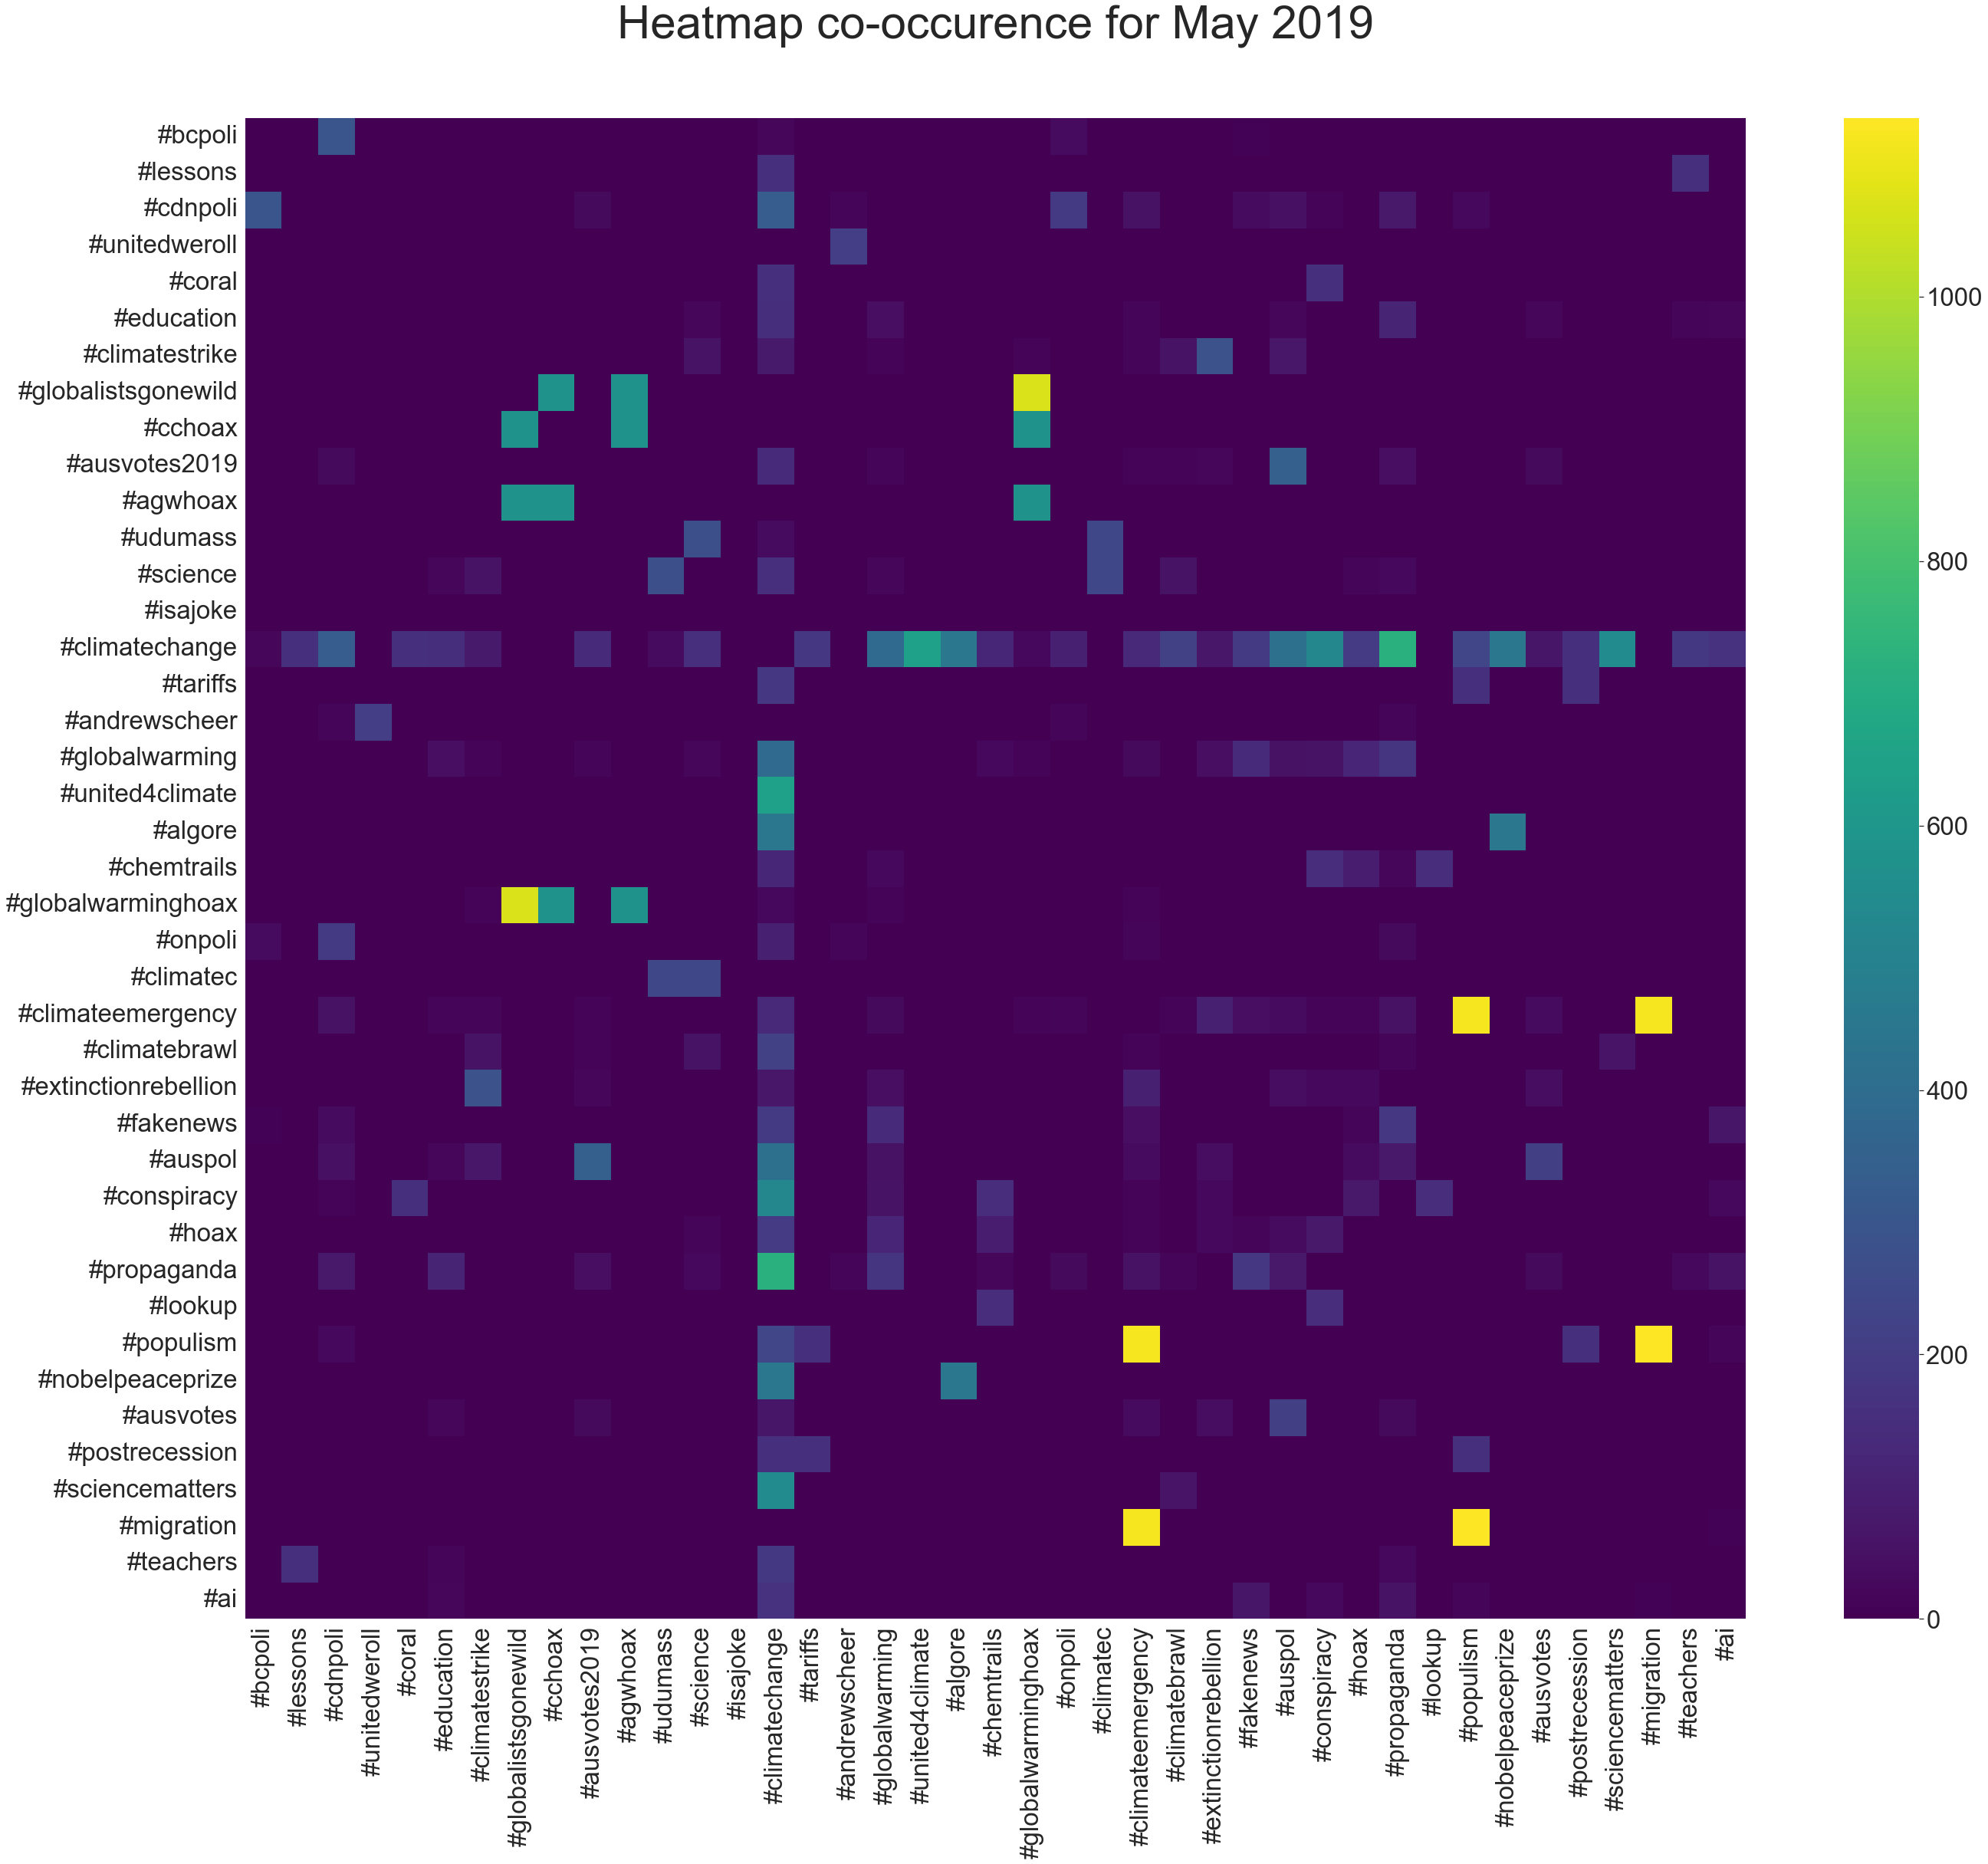

In [11]:
sns.heatmap(heatmap_df2, square=True, cmap='viridis')
plt.title("Heatmap co-occurence for May 2019", fontdict= {'fontsize': 60}, y=1.05)
plt.savefig("htags_climate_May19.png")

In [5]:
counter = Counter()

for tag in hashtag_list:
    tag.sort()
    combos = list(combinations(tag, r=2))
    counter.update(combos)


counter.most_common(50)

[(('#migration', '#populism'), 1135),
 (('#climateemergency', '#migration'), 1119),
 (('#climateemergency', '#populism'), 1119),
 (('#globalistsgonewild', '#globalwarminghoax'), 1069),
 (('#climatechange', '#propaganda'), 721),
 (('#climatechange', '#united4climate'), 640),
 (('#agwhoax', '#cchoax'), 572),
 (('#agwhoax', '#globalistsgonewild'), 572),
 (('#agwhoax', '#globalwarminghoax'), 572),
 (('#cchoax', '#globalistsgonewild'), 572),
 (('#cchoax', '#globalwarminghoax'), 572),
 (('#climatechange', '#sciencematters'), 544),
 (('#climatechange', '#conspiracy'), 525),
 (('#algore', '#climatechange'), 450),
 (('#algore', '#nobelpeaceprize'), 450),
 (('#climatechange', '#nobelpeaceprize'), 450),
 (('#auspol', '#climatechange'), 413),
 (('#climatechange', '#globalwarming'), 386),
 (('#auspol', '#ausvotes2019'), 340),
 (('#cdnpoli', '#climatechange'), 330),
 (('#bcpoli', '#cdnpoli'), 295),
 (('#climatestrike', '#extinctionrebellion'), 285),
 (('#science', '#udumass'), 273),
 (('#climatec', 

# Most common hashtags

In [4]:
hashtags_refined = []
for _ in hashtag_list:
    if _ != []:
        hashtags_refined.extend(_)

count_htags = Counter(hashtags_refined)

# uni_htags = list(set(hashtags_refined))
# uni_htags

count_htags.most_common(10)

[('#climatechange', 10360),
 ('#climatebarbie', 3192),
 ('#climateemergency', 2460),
 ('#auspol', 1540),
 ('#propaganda', 1495),
 ('#climate', 1489),
 ('#populism', 1423),
 ('#globalwarming', 1329),
 ('#climatebrawl', 1261),
 ('#cdnpoli', 1171)]

# Concordance

In [101]:
print(climate_strings)

RT : This is Northern Kenya. Here are images that never reach the mainstream media. Climate Change is happening and yet some p… RT : This is Northern Kenya. Here are images that never reach the mainstream media. Climate Change is happening and yet some p… RT : This is Northern Kenya. Here are images that never reach the mainstream media. Climate Change is happening and yet some p… RT : Club of Rome 1973… Depopulation, Climate Hysteria and One World Government… MSM Propaganda https://t.co/fxmNm3AVqb RT : This is Northern Kenya. Here are images that never reach the mainstream media. Climate Change is happening and yet some p… RT : RT : This is Northern Kenya. Here are images that never reach the mainstream media. Climate Change is happ… RT : This is Northern Kenya. Here are images that never reach the mainstream media. Climate Change is happening and yet some p…   Also, curious about what this grand conspiracy is supposed to be? Scientists and politicians are conspiring to make up the th

In [9]:
text = Text(climate_strings.split(" "))
concord_climate = text.concordance("travesty,", width=150, lines=50)

Displaying 50 of 26634 matches:
crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho… rt : the “climate crisis” is a lie, a 
crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho… my dad really things that climate chan
crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho… rt : the “climate crisis” is a lie, a 
crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho… rt : bill nye on global warming: good

crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…  wrong kenny. these issues and the gen
crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho… rt : the “climate crisis” is a lie, a 
crisis” is a lie, a hoax, a fraud, an affront to science and logic, 

In [5]:
res = []
for index, row in df.iterrows():
    if "#populism" in row.tweet_text:
        res.append(row.tweet_text)

    
res[0:100]


['@geraldkutney #populism simplifies complex big issues like climate change and strategies to 2 words, from your home decisions, to work place to hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn',
 '@geraldkutney #populism simplifies complex big issues like climate change and strategies to 2 words, from your home decisions, to work place to hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn',
 '#populism #tariffs #climatechange.  you got this.  you speak #postrecession.  https://t.co/is7vja2z3i',
 '@geraldkutney #populism simplifies complex big issues like climate change and strategies to 2 words, from your home decisions, to work place to hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn',
 '#populism #tariffs #climatechange.  you got this.  you speak #postrecession.  https://t.co/is7vja2z3i',
 '@geraldkutney #populism simplifies complex big issues like climate change and strategies to 2 words, from your 

# Random tweets


In [59]:
sample = df.sample(n=10)
pprint(sample.tweet_text)

64899091    rt @pokershash: modi’s\n\n15 lakh: never promised\n2 crore job: false, never promised\nclimate not changed: clipped, false propaganda\n\nrahul’s…
50598383         rt @ecosensenow: the “climate crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…
3622513         rt @sankrant: fake news. world over in hot tropical climates native women were often bare chested,\nas men were. western women’s “bra-burnin…
61405454         rt @ecosensenow: the “climate crisis” is a lie, a hoax, a fraud, an affront to science and logic, a travesty, an economic and social sinkho…
51885812         rt @khayhoe: usgs director reilly, a former astronaut and petroleum geologist, claims the national climate assessment used "inaccurate mode…
25214999                                                  people who call climate change "liberal propaganda" are the same people who think the earth is flat
50715721         rt @ecosensenow: the “climate crisi

In [9]:
for index, row in df.iterrows():
    if "#populism" in row.tweet_text:
        pprint(row.tweet_text)

('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'a

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('populists across the world are significantly more likely to believe in '
 'conspiracy theories about\xa0vaccinations and global warming according to a '
 'landmark global survey, the yougov-cambridge globalism project\xa0\n'
 '#vaccines #populism #denialism #climatechange \n'
 '\n'
 'https://t.co/1tanvlwfua')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('forms of #populism and #brexit  as well as the #climatechange movement show '
 'that politics is changing fast, possibilities for participation are evolving '
 '#myfutureoursociety https://t.co/ma0wi911x5')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('the human race - in a nutshell.\n'
 '#populism fear + anger + racism + climate change denial +\n'
 'oppression of women =')
('#populism #tariffs #

('forms of #populism and #brexit  as well as the #climatechange movement show '
 'that politics is changing fast, possibilities for participation are evolving '
 '#myfutureoursociety https://t.co/ma0wi911x5')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('the human race - in a nutshell.\n'
 '#populism fear + anger + racism + climate change denial +\n'
 'oppression of women =')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
("europe's top three challenges are not #brexit, #migration or #populism. eu "
 'needs to brace for facing worse consequences of climate change, ageing '
 'population (pension, not taxing bracket) and digital revolutions (it would '
 'play havoc with labour market) \n'
 'https://t.co/0vhi6yl4pc')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('rt @greeneujournal: from #climatech

('rt @eudebate: today is the day! the next @eu_commission president is waiting '
 'for your thoughts on #climateemergency, #populism, #migration,…')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('populists across the world are significantly more likely to believe in '
 'conspiracy theories about\xa0vaccinations and global warming according to a '
 'landmark global survey, the yougov-cambridge globalism project\xa0\n'
 '#vaccines #populism #denialism #climatechange \n'
 '\n'
 'https://t.co/1tanvlwfua')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  h

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('populists across the world are significantly more likely to believe in '
 'conspiracy theories about\xa0vaccinations and global warming according to a '
 'landmark global survey, the yougov-cambridge globalism project\xa0\n'
 '#vaccines #populism #denialism #climatechange \n'
 '\n'
 'https://t.co/1tanvlwfua')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('forms of #populism and #brexit  as well as the #climatechange movement show '
 'that politics is changing fast, possibilities for participation are evolving '
 '#myfutureoursociety https://t.co/ma0wi911x5')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('the human race - in a nutshell.\n'
 

('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('populists across the world are significantly more likely to believe in '
 'conspiracy theories about\xa0vaccinations and global warming according to a '
 'landmark global survey, the yougov-cambridge globalism project\xa0\n'
 '#vaccines #populism #denialism #climatechange \n'
 '\n'
 'https://t.co/1tanvlwfua')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('forms of #populism and #brexit  as well as the #climatechange movement show '
 'that politics is changing fast, possibilit

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('populists across the world are significantly more likely to believe in '
 'conspiracy theories about\xa0vaccinations and global warming according to a '
 'landmark global survey, the yougov-cambridge globalism project\xa0\n'
 '#vaccines #populism #denialism #climatechange \n'
 '\n'
 'https://t.co/1tanvlwfua')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('forms of #populism and #brexit  as well as the #climatechange movement show '
 'that politics is changing fast, possibilities for participation are evolving '
 '#myfutureoursociety https://t.co/ma0wi911x5')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('the human race - in a nutshell.\n'
 

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('populists across the world are significantly more likely to believe in '
 'conspiracy theories about\xa0vaccinations and global warming according to a '
 'landmark global survey, the yougov-cambridge globalism proje

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('populists across the world are significantly more likely to believe in '
 'conspiracy theories about\xa0vaccinations and global warming according to a '
 'landmark global survey, the yougov-cambridge globalism project\xa0\n'
 '#vaccines #populism #denialism #climatechange \n'
 '\n'
 'https://t.co/1tanvlwfua')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('forms of #po

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('populists across the world are significantly more likely to believe in '
 'conspiracy theories about\xa0vaccinations and global warming according to a '
 'landmark global survey, the yougov-cambridge globalism project\xa0\n'
 '#vaccines #populism #denialism #climatechange \n'
 '\n'
 'https://t.co/1tanvlwfua')
('#populism #t

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('populists across the world are significantly more likely to believe in '
 'conspiracy theories about\xa0vaccinations and global warming according to a '
 'landmark global survey, the yougov-cambridge globalism project\xa0\n'
 '#vaccines #populism #denialism #climatechange \n'
 '\n'
 'https://t.co/1tanvlwfua')
('#populism #t

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('what the rise of #rightwing #populism in #europe means for #climatescience '
 '#denial. https://t.co/opnygve2zh')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('populists across the world are significantly more likely to believe in '
 'conspiracy theories about\xa0vaccinations and global warming according to a '
 'landmark global survey, the yougov-cambridge globalism project\xa0\n'
 '#vaccines #populism #denialism #climatechange \n'
 '\n'
 'https://t.co/1tanvlwfua')
('#popul

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('what the rise of #rightwing #populism in #europe means for #climatescience '
 '#denial. https://t.co/opnygve2zh')
('green party beats tories into fifth place at european elections as support '
 'surges #fbpe #brexit #populism #brexitvote #peoplesvote #exitbrexit #remain '
 '#greenwave #climatecrisis https://t.co/cpfv5qucuz')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i'

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('what the rise of #rightwing #populism in #europe means for #climatescience '
 '#denial. https://t.co/opnygve2zh')
('green party beats tories into fifth place at european elections as support '
 'surges #fbpe #brexit #populism #brexitvote #peoplesvote #exitbrexit #remain '
 '#greenwave #climatecrisis https://t.co/cpfv5qucuz')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn'

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('what the rise of #rightwing #populism in #europe means for #climatescience '
 '#denial. https://t.co/opnygve2zh')
('green party beats tories into fifth place at european elections as support '
 'surges #fbpe #brexit #populism #brexitvote #peoplesvote #exitbrexit #remain '
 '#greenwave #climatecrisis https://t.co/cpfv5qucuz')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('@geraldkutney #populism simplifies complex big issues like climate change '
 'and strategies to 2 words, from your home decisions, to work place to '
 'hospitals, flood protection,  forest fires #conservatives #cdnpoli @reggcohn'

('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('what the rise of #rightwing #populism in #europe means for #climatescience '
 '#denial. https://t.co/opnygve2zh')
('green party beats tories into fifth place at european elections as support '
 'surges #fbpe #brexit #populism #brexitvote #peoplesvote #exitbrexit #remain '
 '#greenwave #climatecrisis https://t.co/cpfv5qucuz')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')
('#populism #tariffs #climatechange.  you got this.  you speak '
 '#postrecession.  https://t.co/is7vja2z3i')


# TF-IDF

In [4]:
no_retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        continue
    elif row.is_reply:
        continue
    else:
        no_retweets.append(row.tweet_text)

In [5]:
len(no_retweets)

43064

In [6]:
tfidf_data = [preprocess_text(tweet) for tweet in no_retweets]

In [7]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_wm = tfidfvectorizer.fit_transform(tfidf_data)

tfidf_tokens = tfidfvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.todense(),index = range(0,len(tfidf_data)),columns = tfidf_tokens)

In [8]:
tokens_above_threshold = df_tfidfvect.max()[df_tfidfvect.max() > 0.7].sort_values(ascending=False)

In [9]:
tokens_above_threshold

disinformation    0.956855
gt                0.952864
5anvc2hlk1        0.952757
fascist           0.950828
hoax              0.950274
huh               0.902055
l4iucsslzy        0.894310
coverup           0.882162
ur                0.881765
l6hnbshmrz        0.881534
right             0.878020
xzx2cokixb        0.877782
progressive       0.875446
dkiygspsj8        0.865779
foreign           0.864549
fakenewsmedia     0.862163
mudi              0.859461
chineese          0.858069
jxazk5spxe        0.853226
squid             0.837177
broadcaster       0.836756
leftist           0.836382
4chong            0.835116
asteroid          0.829771
x9dwt0sk2k        0.829337
mum               0.823595
36hxmx8m6p        0.814500
label             0.801432
modern            0.798368
deforestation     0.798141
emergency         0.797954
im                0.793991
care              0.792029
rypu8iwipo        0.791439
conspiracy        0.783373
gbm0ibzspi        0.782739
junk              0.778726
p